In [47]:
import pandas as pd
import numpy as np

# Path to your CSV file
df = pd.read_csv("/Users/elloramallickbanerji/Documents/GitHub/Elevate_labs-Task-/Housing.csv")

# Preview the dataset
print(df.head())
print(df.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [49]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [51]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 979679.69
MSE: 1771751116594.03
R² Score: 0.65


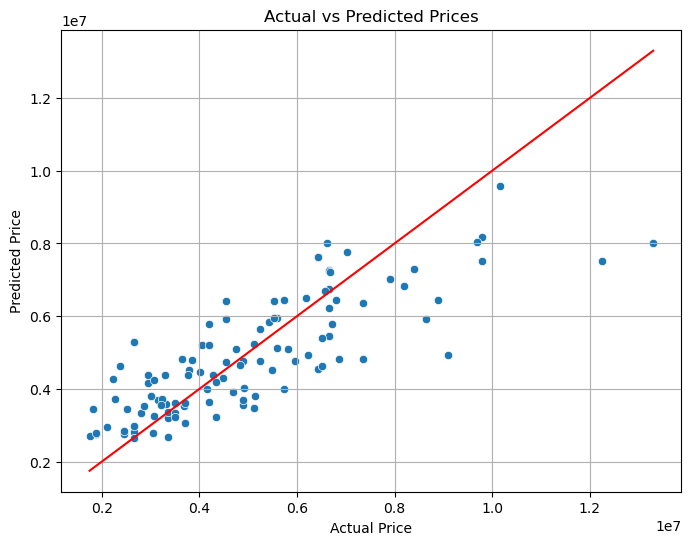

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # 45-degree line
plt.grid(True)
plt.show()

In [59]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coeff_df.sort_values(by='Coefficient', ascending=False))

             Feature   Coefficient
2          bathrooms  1.097117e+06
8    airconditioning  7.855506e+05
7    hotwaterheating  6.878813e+05
10          prefarea  6.299017e+05
3            stories  4.062232e+05
6           basement  3.931598e+05
4           mainroad  3.668242e+05
5          guestroom  2.331468e+05
9            parking  2.257565e+05
1           bedrooms  7.857449e+04
0               area  2.358488e+02
11  furnishingstatus -2.103971e+05
